In [88]:
a = euclidean_norm(sub((3.1,3), (1,1)))**2
b = euclidean_norm(sub((5,5), (3.1,3)))**2
print(a)
print(b)

8.41
7.6099999999999985


[(2, 2), (1, 3)]
[(4.409090909090909, 3.0), (1.0, 3.0)]
[(4.65, 3.1), (1.5, 2.5)]
[(4.833333333333333, 3.3333333333333335), (2.0, 2.0)]
[(4.9375, 3.625), (2.5, 1.75)]
[(5.142857142857143, 3.7857142857142856), (2.7, 1.9)]


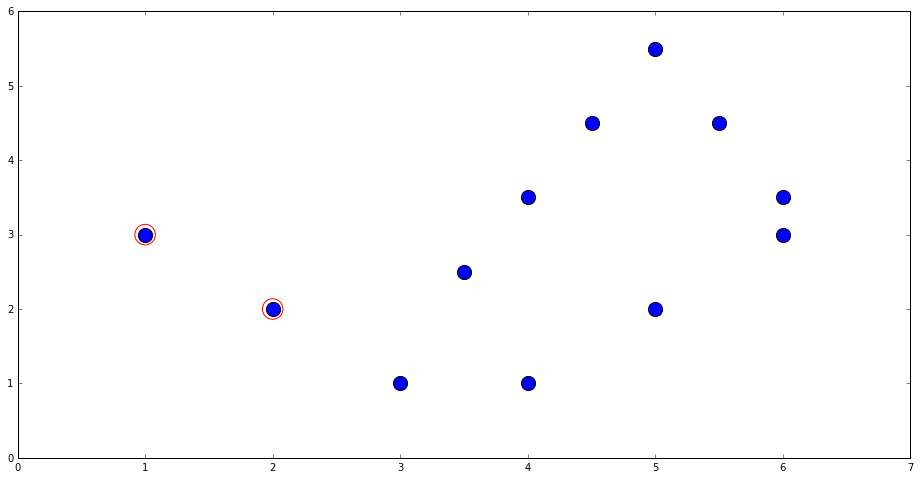

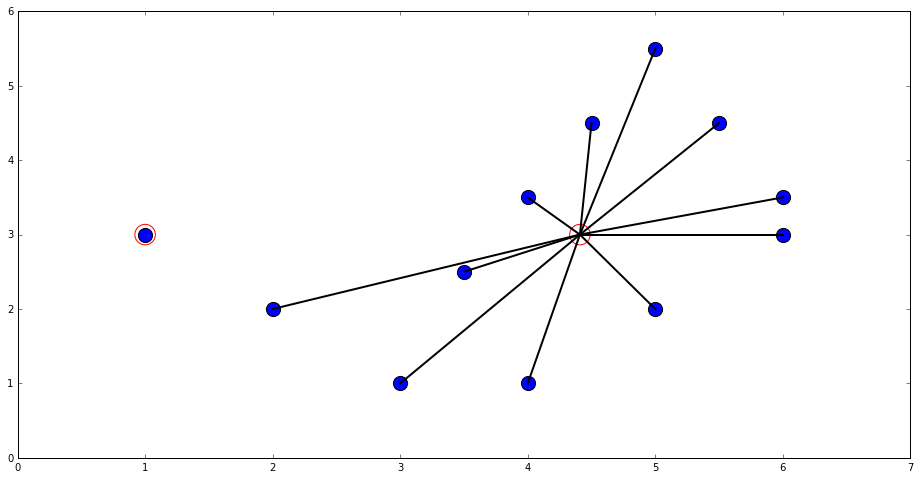

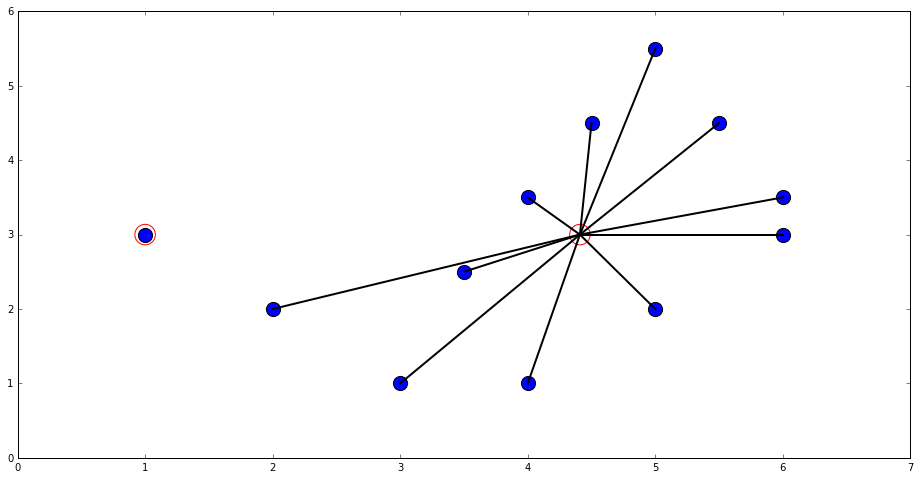

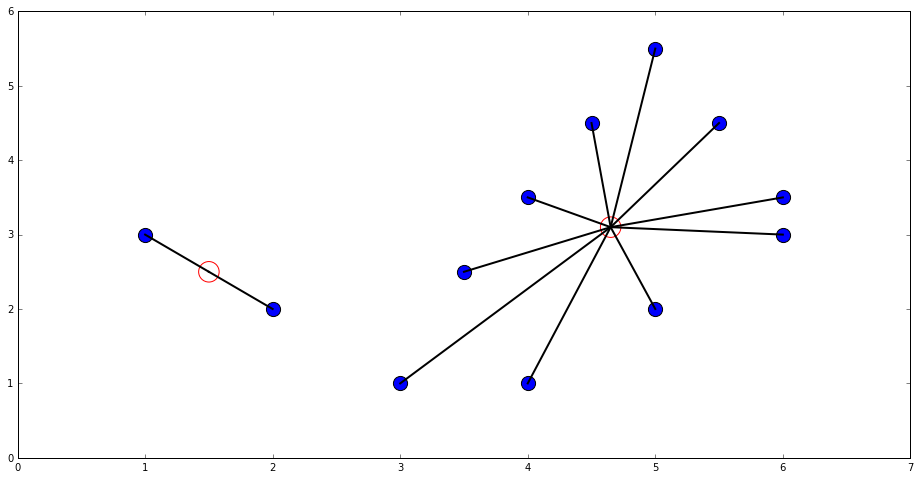

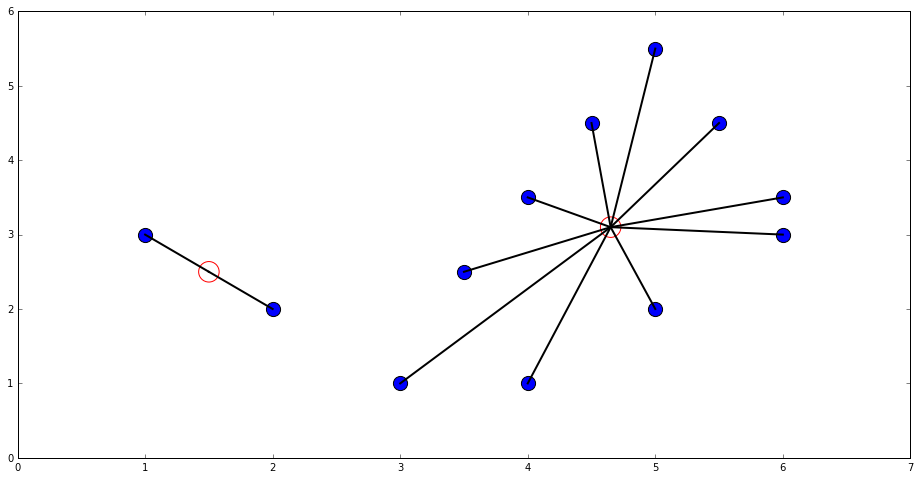

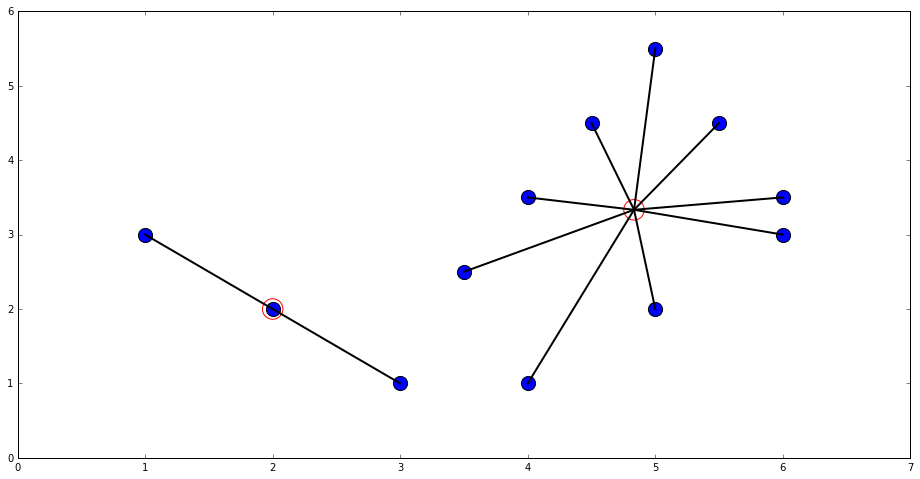

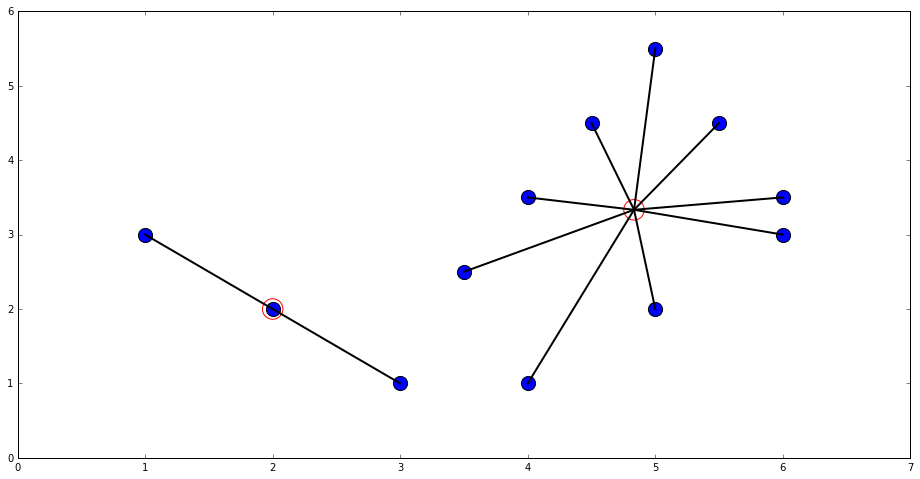

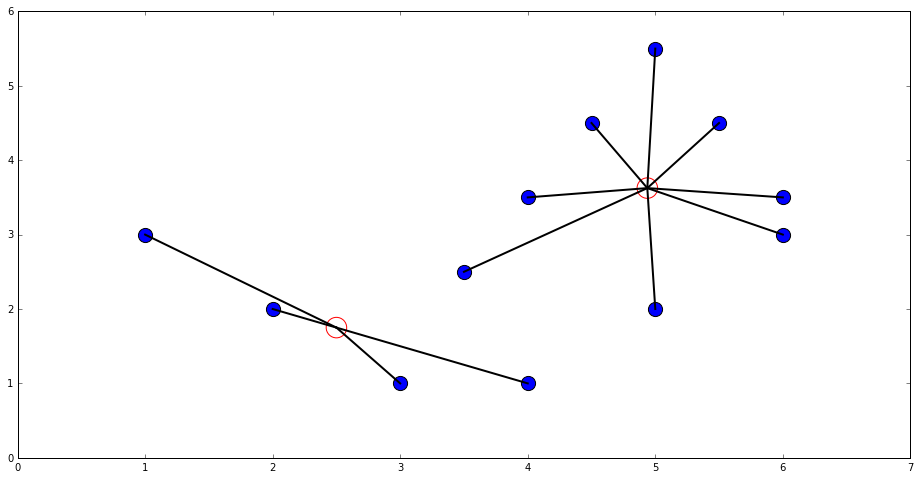

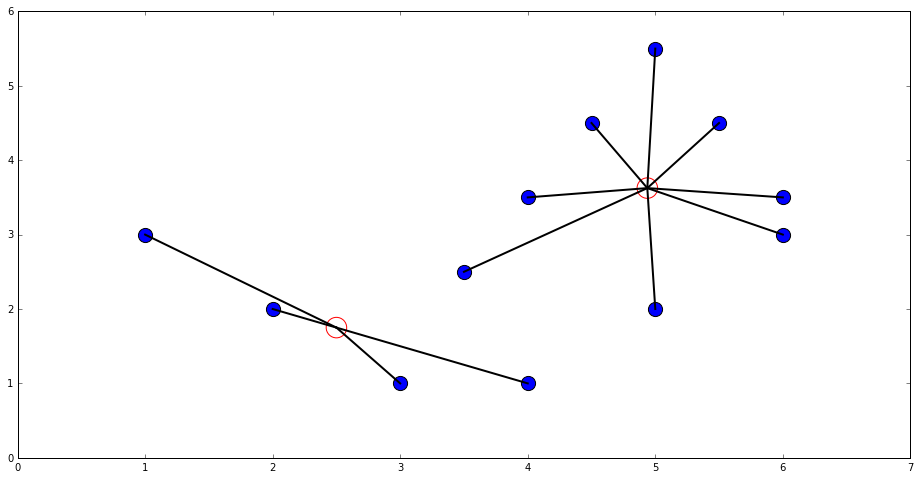

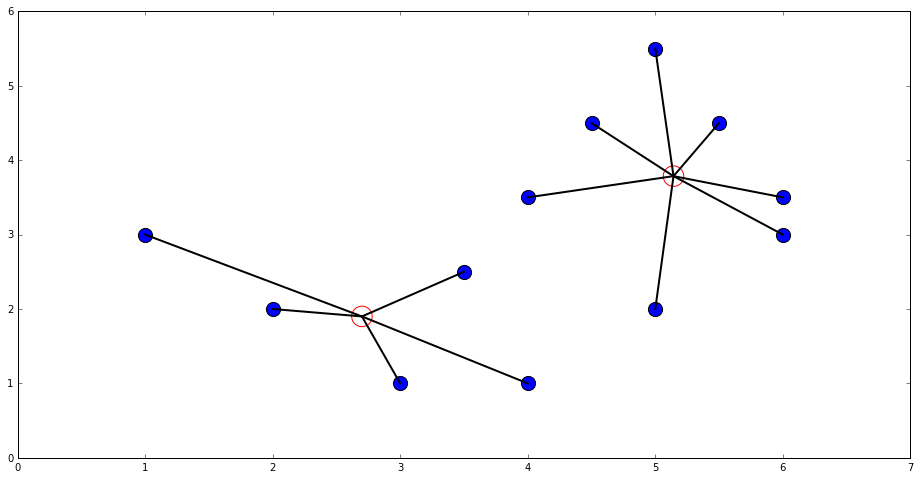

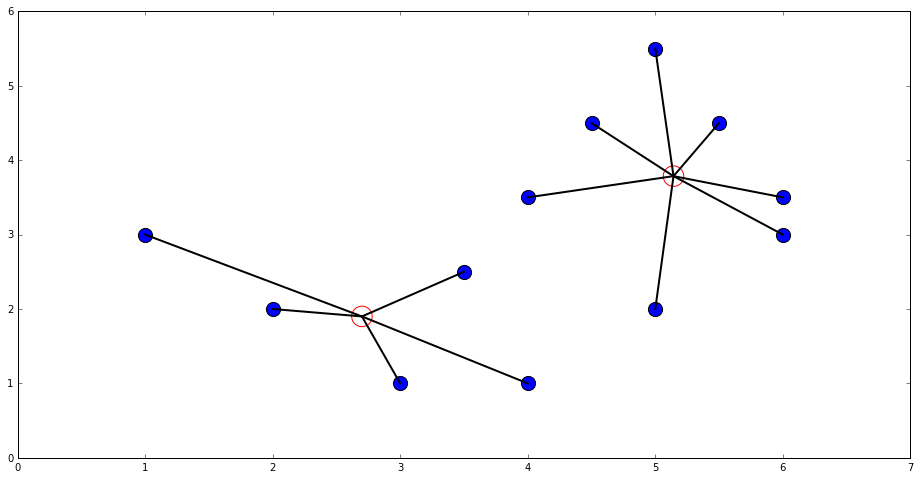

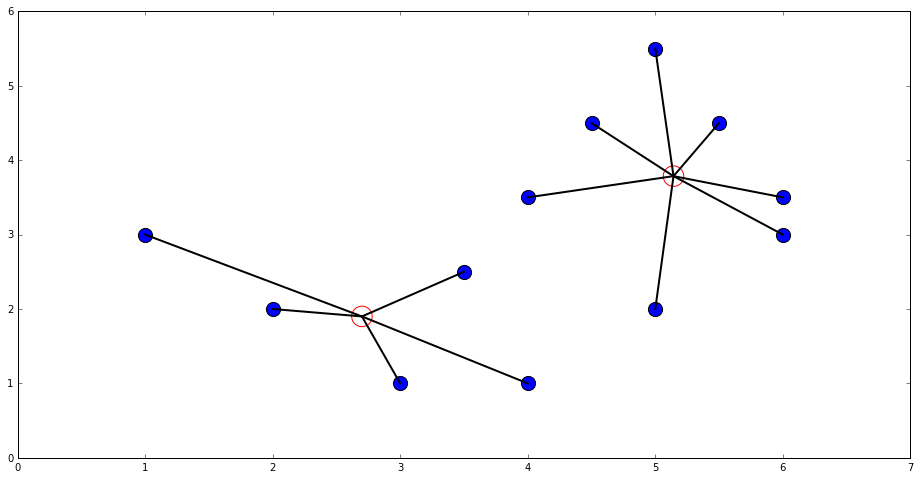

In [102]:
import math
from random import randint

# (a)
I = [
    (1,8),
    (1,3),
    (7,2),
    (4,6),
    (6,3),
    (5,2),
    (0,0),
    (3,7),
    (19,19)
]

# empty cluster
I = [
    (1,1),
    (2.2, 2.4),
    (2.3, 2.7),
    (2.4, 2.9),
    (3.1, 3),
    (5, 5),
    (5.5, 4.5)
]

# convex
I = [
    (1,3),
    (2,2),
    (3,1),
    (4,1),
    (5,2),
    (6,3),
    
    (3.5,2.5),
    (4,3.5),
    (4.5,4.5),
    (5,5.5),
    (5.5,4.5),
    (6,3.5)
]

def sub(v, w):
    assert(len(v) == len(w))
    return v[0] - w[0], v[1] - w[1]


def add(v, w):
    assert (len(v) == len(w))
    return v[0] + w[0], v[1] + w[1]


def mul(v, scalar):
    return v[0] * scalar, v[1] * scalar


def div(v, scalar):
    return v[0] / scalar, v[1] /scalar


def euclidean_norm(v):
    s = 0
    for e in v:
        s += e**2
    return math.sqrt(s)


def k_means(I, k):
    n = len(I)
    C = []
    idxs = list(range(n))
    for j in range(k):
        idx = randint(0, len(idxs) - 1)
        C.append((I[idxs.pop(idx)]))
        
    #C = [I[0], I[5], I[6]]

    z = []
    for j in range(k):
        T = []
        z.append(T)
        for i in range(n):
            T.append(0)

    delta = 99
    while delta > 0:
        plot(z, I, C)
        print(C)
        delta = 0
        for i, x in enumerate(I):
            best_distance = 999999
            best_j = -1
            for j, mu in enumerate(C):
                distance = euclidean_norm(sub(x, mu))**2
                if distance < best_distance:
                    best_distance = distance
                    best_j = j
                z[j][i] = 0
            z[best_j][i] = 1

        # update mean
        for j, mu in enumerate(C):
            sum_ = 0
            sum_v = (0, 0)
            for i, x in enumerate(I):
                z_ij = z[j][i]
                sum_ += z_ij
                sum_v = add(sum_v, mul(x, z_ij))
            if sum_ > 0:
                C[j] = div(sum_v, sum_)

            delta += euclidean_norm(sub(mu, C[j]))**2
    
        plot(z, I, C)
        
    return z

z = k_means(I, 2)

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(z, I_, C_):
    I = np.array(I_)
    C = np.array(C_)
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    ax.scatter(I[:,0], I[:,1], c='b', s=200)
    ax.scatter(C[:,0], C[:,1], s=420, facecolors='none', edgecolors='r')
    
    for i, x in enumerate(I):
        for j, mu in enumerate(C):
            if z[j][i] == 1:
                ax.plot([x[0], mu[0]], [x[1], mu[1]], 'k-', lw=2)
    